## Fetching Tweets Using Tweepy

#### Import Libraries

In [1]:
import tweepy 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
#stop = stopwords.words("english")

import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
from matplotlib.cm import Reds, Greens, Purples, Greys
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('stopwords')

In [2]:
stop = stopwords.words('english')

### Setting up the Twitter API

- You will have to create/apply a developer account at: <a href=developer.twitter.com>developer.twitter.com</a>
- Click on Apply for developer account
- Login with your Twitter account( You will have to create one, if you do not have an account already)
- Fill out the form and you are done

In [3]:
CONSUMER_KEY = 'ZlDRrtMXkBw2XXEwRutCijwqb'
CONSUMER_SECRET = 's38KF1KmXtgF9YzGLkdc88AgnbRAyqdVJQlzvnoTQ98vVvy54T'


ACCESS_TOKEN = '1562699636267438083-zwlML1TdiFUSj3GRcA1S8LKEBNLaZ1' 
ACCESS_SECRET = 'r4l4obMGKTRZzTb3ZZEyioU0GnbblTWhC4v2VtwRMHbuZ'

In [4]:
# Setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth)
    return api


# Create API object
api = connect_to_twitter_OAuth()

## Fetching Tweets for a Tweet Handle 

In [103]:
## Fecting Tweets from persons for eg:
#@elonmusk
#@NASA
#@narendramodi
#@iHrithik

# we are taking one specific user
tweets = api.user_timeline(screen_name = '@elonmusk', count = 20)

In [104]:
i = 0
for tweet in tweets:
    i += 1
    print(i,':',tweet.text)

1 : @MatchasmMatt @jasondebolt @heydave7 That, plus pessimism about the future / false overpopulation fears
2 : @heydave7 Yes
3 : (And I do think global warming is a major risk)
4 : @teslaownersSV Yes
5 : Mark these words
6 : Population collapse due to low birth rates is a much bigger risk to civilization than global warming
7 : @SciGuySpace Good summary
8 : @teslaownersSV Yes
9 : @heydave7 Yes
10 : Note, connectivity will be 2 to 4 Mbits per cell zone, so will work great for texting &amp; voice calls, but not high bandwidth
11 : Starlink V2, launching next year, will transmit direct to mobile phones, eliminating dead zones worldwide
12 : RT @SpaceX: Watch live as Elon and @TMobile CEO and President Mike Sievert announce plans to increase connectivity → https://t.co/pxgvgTWzr…
13 : Livestream of big news in about an hour https://t.co/LSMIRYBxHH
14 : @teslaownersSV 10.69.1 releases Monday night. 10.69.2 about a week or so later – this will be the wide beta version.
15 : @SawyerMerritt @

In [105]:
tweets3 = api.user_timeline(screen_name = '@venkat_parangi',count = 20)

In [106]:
i = 0
for tweet in tweets3:
    i += 1
    print(i,':',tweet.text)

1 : RT @Mokshagna_Offl: Just Now #Bimbisara Show Completed 👍
Kalyan Anna Maassss Comeback 🔥🔥
Best Experience In Recent Times 🙏👌
Rating : 4/5 
G…


In [107]:
for tweet in tweets:
    print(type(tweet))
    break

<class 'tweepy.models.Status'>


In [108]:
tweet

Status(_api=<tweepy.api.API object at 0x00000179BD02EC70>, _json={'created_at': 'Fri Aug 26 13:51:54 +0000 2022', 'id': 1563162322239373315, 'id_str': '1563162322239373315', 'text': '@MatchasmMatt @jasondebolt @heydave7 That, plus pessimism about the future / false overpopulation fears', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'MatchasmMatt', 'name': 'Matt Smith', 'id': 778282085433876480, 'id_str': '778282085433876480', 'indices': [0, 13]}, {'screen_name': 'jasondebolt', 'name': 'Jason DeBolt ⚡️', 'id': 298274977, 'id_str': '298274977', 'indices': [14, 26]}, {'screen_name': 'heydave7', 'name': 'Dave Lee', 'id': 29893444, 'id_str': '29893444', 'indices': [27, 36]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1563156583080919041, 'in_reply_to_status_id_str': '1563156583080919041', 'in_reply_to_user_id': 778282085433876480, 'in_reply_to_user

In [109]:
tweet_id = tweet.id                                  # unique id name for user
text = tweet.text                                    # text what the person tweets 
favorite_count = tweet.favorite_count                # number of times this tweet liked   
retweet_count = tweet.retweet_count                  #number of time this tweet retweeted 
created_at = tweet.created_at                        # when the tweet is created time 
source = tweet.source                                # utility used to post tweet (eg: from android, iphone,web...)
reply_to_status = tweet.in_reply_to_status_id        # if reply int of orginal tweet id
reply_to_user = tweet.in_reply_to_screen_name        # if reply original tweets screen_name 

print("tweet_id:",tweet_id)
print("text:",text)
print("favorite_count:",favorite_count)
print("retweet_count:",retweet_count)
print("created_at:",created_at)
print("source:",source)
print("reply_to_status:",reply_to_status)
print("reply_to_user:",reply_to_user)

tweet_id: 1563162322239373315
text: @MatchasmMatt @jasondebolt @heydave7 That, plus pessimism about the future / false overpopulation fears
favorite_count: 686
retweet_count: 46
created_at: 2022-08-26 13:51:54+00:00
source: Twitter for iPhone
reply_to_status: 1563156583080919041
reply_to_user: MatchasmMatt


## Tweeting from your handle

In [ ]:
# Here, I'm tweeting a tweet in twitter from api 
api.update_status("hello")

## Getting tweets from different crypto currencies

In [6]:
crypto_list = {'@ethereum','@litecoin','@Tether_to','@dogecoin','@Polkadot','@btc'}

In [7]:
# Array to hold tweet data
tweet_list = []
# Iterate through all the crypto_list
for crypto in crypto_list:
    # Bring out the 200 tweets
    print('Getting tweets for:',crypto)
    crypto_tweets = api.user_timeline(screen_name=crypto, count=300)
    time.sleep(1)
    # Loop through the 200 tweets
    for tweet in crypto_tweets:
        tweet_id = tweet.id # unique integer identifier for tweet
        text = tweet.text # utf-8 text of tweet
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        created_at = tweet.created_at # utc time tweet created
        source = tweet.source # utility used to post tweet
        reply_to_status = tweet.in_reply_to_status_id # if reply int of orginal tweet id
        reply_to_user = tweet.in_reply_to_screen_name # if reply original tweetes screenname
        retweets = tweet.retweet_count # number of times this tweet retweeted
        favorites = tweet.favorite_count # number of time this tweet liked
        # append attributes to list
        tweet_list.append({'crypto':crypto,
                          'tweet_id':tweet_id, 
                          'text':text, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source, 
                          'reply_to_status':reply_to_status, 
                          'reply_to_user':reply_to_user,
                          'retweets':retweets,
                          'favorites':favorites})
print('Done...')       

Getting tweets for: @ethereum
Getting tweets for: @dogecoin
Getting tweets for: @Polkadot
Getting tweets for: @Tether_to
Getting tweets for: @litecoin
Getting tweets for: @btc
Done...


In [8]:
len(tweet_list)

1200

In [9]:
tweet_list[400]

{'crypto': '@Polkadot',
 'tweet_id': 1562844847987634176,
 'text': 'In 10 minutes now, tune in to the #Web3Talks to learn how Polkadot is changing the way blockchains can communicate… https://t.co/LxrPr6EWu0',
 'favorite_count': 259,
 'retweet_count': 56,
 'created_at': datetime.datetime(2022, 8, 25, 16, 50, 22, tzinfo=datetime.timezone.utc),
 'source': 'Twitter Web App',
 'reply_to_status': None,
 'reply_to_user': None,
 'retweets': 56,
 'favorites': 259}

In [10]:
tweet_list[0]

{'crypto': '@ethereum',
 'tweet_id': 1562711362005962753,
 'text': 'RT @EDCON_Online: This Sunday AUG 28th, EDCON2022 will be celebrating The Merge at Chase Center in San Francisco.\n\nSpeakers will be discuss…',
 'favorite_count': 0,
 'retweet_count': 45,
 'created_at': datetime.datetime(2022, 8, 25, 7, 59, 57, tzinfo=datetime.timezone.utc),
 'source': 'Twitter Web App',
 'reply_to_status': None,
 'reply_to_user': None,
 'retweets': 45,
 'favorites': 0}

In [11]:
tweet_data = pd.DataFrame(tweet_list)
print(tweet_data.shape)
tweet_data.head()

(1200, 11)


crypto             tweet_id  \
0  @ethereum  1562711362005962753   
1  @ethereum  1562416405777096705   
2  @ethereum  1562392723537252352   
3  @ethereum  1562121524554997760   
4  @ethereum  1562020749250109440   

                                                text  favorite_count  \
0  RT @EDCON_Online: This Sunday AUG 28th, EDCON2...               0   
1  RT @JBSchweitzer: This is it: The Merge is com...               0   
2  RT @go_ethereum: We've just released Geth v1.1...               0   
3  RT @SomerEsat: Proud to announce that I have p...               0   
4  RT @EFDevcon: 📢🥁🎟️\nTomorrow will be the last ...               0   

   retweet_count                created_at           source  reply_to_status  \
0             45 2022-08-25 07:59:57+00:00  Twitter Web App              NaN   
1            593 2022-08-24 12:27:54+00:00  Twitter Web App              NaN   
2             80 2022-08-24 10:53:47+00:00  Twitter Web App              NaN   
3            100 2022-08-23 16:56:08+00:00  Twitter Web App              NaN   
4             46 2022-08-23 10:15:42+00:00  Twitter Web App              NaN   

  reply_to_user  retweets  favorites  
0          None        45          0  
1          None       593          0  
2          None        80          0  
3          None       100          0  
4          None        46          0

In [12]:
tweet_data.tail(2)

crypto             tweet_id  \
1198   @btc  1551952986288553984   
1199   @btc  1551930344735219714   

                                                   text  favorite_count  \
1198  Another bill was just introduced for exempting...              35   
1199  Brazilian brokerage firm, XP Inc, will offer #...               9   

      retweet_count                created_at     source  reply_to_status  \
1198              9 2022-07-26 15:30:00+00:00  TweetDeck              NaN   
1199              2 2022-07-26 14:00:02+00:00  TweetDeck              NaN   

     reply_to_user  retweets  favorites  
1198          None         9         35  
1199          None         2          9

In [13]:
tweet_data.to_csv('Tweets1.csv',index = None)

## Eploring the Data

In [14]:
tweetDf = tweet_data.copy()

In [15]:
tweetDf

crypto             tweet_id  \
0     @ethereum  1562711362005962753   
1     @ethereum  1562416405777096705   
2     @ethereum  1562392723537252352   
3     @ethereum  1562121524554997760   
4     @ethereum  1562020749250109440   
...         ...                  ...   
1195       @btc  1552323446058909696   
1196       @btc  1552005839841464320   
1197       @btc  1551961028438532097   
1198       @btc  1551952986288553984   
1199       @btc  1551930344735219714   

                                                   text  favorite_count  \
0     RT @EDCON_Online: This Sunday AUG 28th, EDCON2...               0   
1     RT @JBSchweitzer: This is it: The Merge is com...               0   
2     RT @go_ethereum: We've just released Geth v1.1...               0   
3     RT @SomerEsat: Proud to announce that I have p...               0   
4     RT @EFDevcon: 📢🥁🎟️\nTomorrow will be the last ...               0   
...                                                 ...             ...   
1195  Today’s #Bitcoin price update\n\nCurrent price...              11   
1196  Have you participated in the stackchain yet? 👀...              50   
1197  Today’s #Bitcoin price update\n\nCurrent price...              14   
1198  Another bill was just introduced for exempting...              35   
1199  Brazilian brokerage firm, XP Inc, will offer #...               9   

      retweet_count                created_at           source  \
0                45 2022-08-25 07:59:57+00:00  Twitter Web App   
1               593 2022-08-24 12:27:54+00:00  Twitter Web App   
2                80 2022-08-24 10:53:47+00:00  Twitter Web App   
3               100 2022-08-23 16:56:08+00:00  Twitter Web App   
4                46 2022-08-23 10:15:42+00:00  Twitter Web App   
...             ...                       ...              ...   
1195              2 2022-07-27 16:02:04+00:00    BTC Times Bot   
1196             11 2022-07-26 19:00:01+00:00        TweetDeck   
1197              3 2022-07-26 16:01:57+00:00    BTC Times Bot   
1198              9 2022-07-26 15:30:00+00:00        TweetDeck   
1199              2 2022-07-26 14:00:02+00:00        TweetDeck   

      reply_to_status reply_to_user  retweets  favorites  
0                 NaN          None        45          0  
1                 NaN          None       593          0  
2                 NaN          None        80          0  
3                 NaN          None       100          0  
4                 NaN          None        46          0  
...               ...           ...       ...        ...  
1195              NaN          None         2         11  
1196              NaN          None        11         50  
1197              NaN          None         3         14  
1198              NaN          None         9         35  
1199              NaN          None         2          9  

[1200 rows x 11 columns]

In [16]:
tweetDf.crypto.value_counts()

@ethereum     200
@dogecoin     200
@Polkadot     200
@Tether_to    200
@litecoin     200
@btc          200
Name: crypto, dtype: int64

In [17]:
source = tweetDf.source.value_counts()
source

Twitter Web App            480
TweetDeck                  397
Hootsuite Inc.             186
Twitter for iPhone          64
Buffer                      34
BTC Times Bot               31
HubSpot                      5
Twitter for Advertisers      2
Revue                        1
Name: source, dtype: int64

In [18]:
trace = go.Pie(labels = source.index,values = source,showlegend = False,hole = 0.33, text = [str(round(i*100,3))+'%' for i in source/sum(source)], hovertext = 'Source',
              hoverinfo = 'label+text',textinfo = 'text+label'
              )

layout = go.Layout(title = "which Device people are using?")
fig = go.Figure(data = [trace],layout = layout)
fig.show()

- **Most of people using Twitter Web App and TweetDeck**

### Most ReTweets and Favorites

In [21]:
source = tweetDf.groupby('crypto').agg(sum)[['favorite_count','retweet_count']]

In [22]:
source

favorite_count  retweet_count
crypto                                   
@Polkadot            38440           9129
@Tether_to           46464          17092
@btc                  4513           7904
@dogecoin           635399         200383
@ethereum             3223          32746
@litecoin            28131           9521

- **Most favorite counts(6 lakh 35k) and retweets(20 lakh) are from `@dogecoin` It is trending now I think** 
- **Least is `@btc` bitcoin 4513 likes and 7904 RT**

In [24]:
fig = go.Figure()
fig.add_bar(x = source.index, y = source.retweet_count,name = 'Retweet Count')
fig.add_bar(x = source.index, y = source.favorite_count,name = 'Favorite Count(Likes)')

### Most Hashtags used

In [34]:
def hashtag_extract(x):
    hashtags = []
    ht = re.findall(r"#(\w+)", x)
    hashtags.extend(ht)
    if hashtags==[]:
        return ''
    return hashtags
    

In [35]:
tags=[hashtag_extract(x) for  x in tweetDf.text]

In [36]:
all_tags=[]
for tag in tags:
    if tag!='':
        all_tags.extend(tag)

In [37]:
tags_vc={tag:0 for tag in set(all_tags)}
tags_vc                                    # These all hashtags from tweet 

{'JulianAssange': 0,
 '4': 0,
 'suchmem': 0,
 'DN22hackathon': 0,
 'CanadaDay': 0,
 'stackchain': 0,
 'Bullish': 0,
 'ElSalvador': 0,
 'SaturdayMotivation': 0,
 'DCA': 0,
 'HappyThanksgiving': 0,
 'RoadToDevcon': 0,
 'PhalaApp': 0,
 'DogeNodes': 0,
 'tesla': 0,
 'Tennessee': 0,
 'Web3Talks': 0,
 'wednesdaythought': 0,
 'DogeDay': 0,
 'Verkle': 0,
 'schweizercu': 0,
 'Davos2022': 0,
 'fridaymorning': 0,
 'libdogecoin': 0,
 'Punk4ThePeople': 0,
 'XCVM': 0,
 'EmergingMarkets': 0,
 'listing': 0,
 'ProofOfWork': 0,
 '012': 0,
 'PlanB': 0,
 'dogecointo1dollar': 0,
 'ETF': 0,
 'AllCoreDevs': 0,
 'AMA': 0,
 'EVM': 0,
 'Litecoi': 0,
 'ComicCon2022': 0,
 'LitecoinSumm': 0,
 'doge4tesla': 0,
 'kabosu': 0,
 'DigiByte': 0,
 'sonofabit': 0,
 'liteco': 0,
 'stablecoin': 0,
 'tether': 0,
 'Bitfinex': 0,
 'giveaway': 0,
 'ETHM': 0,
 'uk': 0,
 '2': 0,
 'planb': 0,
 'bi': 0,
 'buffed': 0,
 'Web3': 0,
 'DogeTwitterTipJar': 0,
 'twitch': 0,
 'love': 0,
 'LasVegas': 0,
 'TradeTalks': 0,
 'Twitterdown': 0,
 

In [38]:
for tweet in tweetDf.text:
    ht = re.findall(r"#(\w+)",tweet)
    if ht != []:
        for tag in ht:
            tags_vc[tag]+=1   

In [39]:
tags_vc_sorted = dict(sorted(tags_vc.items(),key = lambda x:x[1], reverse = True))
tags_vc_sorted               # Hashtags : number is how many times the hashtag was repeated 

{'Bitcoin': 161,
 'BTC': 75,
 'Litecoin': 51,
 'Dogecoin': 38,
 'Tether': 35,
 'crypto': 22,
 'dogecoin': 21,
 'PolkadotDigest': 21,
 'Polkadot': 21,
 'Ethereum': 20,
 'ProofOfWork': 18,
 'tether': 15,
 'LitecoinSummit2022': 15,
 'PolkadotCommunityCall': 12,
 'doge': 11,
 'wow': 10,
 'cryptocurrency': 10,
 'memes': 9,
 'tothemoon': 9,
 'bitcoin': 9,
 'PaywithLitecoin': 8,
 'muchfunny': 8,
 'MWEB': 8,
 'LuganoPlanB': 7,
 'suchmem': 6,
 'dogecoinmoon': 6,
 'thegoodstuff': 6,
 'moonsoon': 6,
 'Davos2022': 5,
 'LTC': 5,
 'LunarCrush': 5,
 'Eth2': 5,
 'Web3Talks': 4,
 'planb': 4,
 'iBTC': 4,
 'litecoin': 4,
 'FridayFeeling': 4,
 'KeepDogeAbsurd': 4,
 'lugano': 4,
 'SaturdayMotivation': 3,
 'AllCoreDevs': 3,
 'web3': 3,
 'keet': 3,
 'verkle': 3,
 'tuesdayvibe': 3,
 'WEF22': 3,
 'DoOnlyGoodEveryday': 3,
 'DogecoinToTheMoon': 3,
 'DN22hackathon': 2,
 'wednesdaythought': 2,
 'sonofabit': 2,
 'liteco': 2,
 '2': 2,
 'Web3': 2,
 'LasVegas': 2,
 'India': 2,
 'cryptocurrencies': 2,
 'Brazil': 2,
 'b

## Cleaning The Data

In [42]:
tweetDf.text.head(10)

0    RT @EDCON_Online: This Sunday AUG 28th, EDCON2...
1    RT @JBSchweitzer: This is it: The Merge is com...
2    RT @go_ethereum: We've just released Geth v1.1...
3    RT @SomerEsat: Proud to announce that I have p...
4    RT @EFDevcon: 📢🥁🎟️\nTomorrow will be the last ...
5    RT @vdWijden: Something Something THE MERGE IS...
6    RT @WeekInEthNews: Latest Week in Ethereum New...
7    RT @TimBeiko: Merge Mainnet Readiness Checklis...
8    RT @go_ethereum: The Geth #Ethereum AMA sessio...
9    RT @go_ethereum: Have questions for the Geth t...
Name: text, dtype: object

### Removing user Handle

In [43]:
## removing user handle 
tweetDf['tidy_tweet'] = tweetDf['text'].replace(to_replace = '(@[\w+])', value = '',regex = True)
tweetDf['tidy_tweet'] = tweetDf['tidy_tweet'].replace(to_replace = ('RT'),value = '',regex = True)

In [44]:
# Before
tweetDf['text'][:10]

0    RT @EDCON_Online: This Sunday AUG 28th, EDCON2...
1    RT @JBSchweitzer: This is it: The Merge is com...
2    RT @go_ethereum: We've just released Geth v1.1...
3    RT @SomerEsat: Proud to announce that I have p...
4    RT @EFDevcon: 📢🥁🎟️\nTomorrow will be the last ...
5    RT @vdWijden: Something Something THE MERGE IS...
6    RT @WeekInEthNews: Latest Week in Ethereum New...
7    RT @TimBeiko: Merge Mainnet Readiness Checklis...
8    RT @go_ethereum: The Geth #Ethereum AMA sessio...
9    RT @go_ethereum: Have questions for the Geth t...
Name: text, dtype: object

In [45]:
#After
tweetDf['tidy_tweet'][:10]

0     DCON_Online: This Sunday AUG 28th, EDCON2022 ...
1     BSchweitzer: This is it: The Merge is coming....
2     o_ethereum: We've just released Geth v1.10.23...
3     omerEsat: Proud to announce that I have publi...
4     FDevcon: 📢🥁🎟️\nTomorrow will be the last set ...
5     dWijden: Something Something THE MERGE IS COM...
6     eekInEthNews: Latest Week in Ethereum News\n\...
7     imBeiko: Merge Mainnet Readiness Checklist is...
8     o_ethereum: The Geth #Ethereum AMA session wi...
9     o_ethereum: Have questions for the Geth team?...
Name: tidy_tweet, dtype: object

### Remove any links from the tweet

In [46]:
#remove any links from the tweet: Links not required for performing sentiment analysis
tweetDf['tidy_tweet'] = tweetDf['tidy_tweet'].str.replace('((www\.[\s]+)|(https?://[^\s]+))','\0',regex = True)

In [51]:
# Before
tweetDf['text'][3]

'RT @SomerEsat: Proud to announce that I have published merge-ready mainnet guides for Lighthouse, Nimbus, Prysm, and Teku! \n\n1/4\n\nhttps://t…'

In [50]:
# After 
tweetDf['tidy_tweet'][3]

' omerEsat: Proud to announce that I have published merge-ready mainnet guides for Lighthouse, Nimbus, Prysm, and Teku! \n\n1/4\n\n\x00'

### Remove special Characters, Numbers, Punctuations

In [52]:
# remove special characters, numbers, punctuations: None of them would add any value to the sentiment score.
tweetDf['tidy_tweet'] = tweetDf['tidy_tweet'].str.replace("[^a-zA-Z]+"," ")

In [53]:
# Before
tweetDf.text[0]

'RT @EDCON_Online: This Sunday AUG 28th, EDCON2022 will be celebrating The Merge at Chase Center in San Francisco.\n\nSpeakers will be discuss…'

In [54]:
#After
tweetDf['tidy_tweet'][0]

' DCON Online This Sunday AUG th EDCON will be celebrating The Merge at Chase Center in San Francisco Speakers will be discuss '

### Tokenising and removing Stop Words

In [57]:
tweetDf["tidy_tweet"] = tweetDf["tidy_tweet"].str.lower()
tweetDf["tidy_tweet"] = tweetDf["tidy_tweet"].str.split()

In [58]:
tweetDf["tidy_tweet"].head()

0    [dcon, online, this, sunday, aug, th, edcon, w...
1    [bschweitzer, this, is, it, the, merge, is, co...
2    [o, ethereum, we, ve, just, released, geth, v,...
3    [omeresat, proud, to, announce, that, i, have,...
4    [fdevcon, tomorrow, will, be, the, last, set, ...
Name: tidy_tweet, dtype: object

In [59]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
tweetDf['tidy_tweet'] = tweetDf['tidy_tweet'].apply(lambda x: [item for item in x if item not in stop])

In [61]:
# Before
tweetDf.text[0]

'RT @EDCON_Online: This Sunday AUG 28th, EDCON2022 will be celebrating The Merge at Chase Center in San Francisco.\n\nSpeakers will be discuss…'

In [65]:
# After 
tweetDf['tidy_tweet'][0]

['dcon',
 'online',
 'sunday',
 'aug',
 'th',
 'edcon',
 'celebrating',
 'merge',
 'chase',
 'center',
 'san',
 'francisco',
 'speakers',
 'discuss']

In [72]:
#Alternate Method: Using TweetTokenizer to tokenize the tweet
tt = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tt.tokenize(s0)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [73]:
def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

tweetDf['tidy_tweet'] = tweetDf.apply(rejoin_words, axis=1)


In [74]:
tweetDf['tidy_tweet'][0]

'dcon online sunday aug th edcon celebrating merge chase center san francisco speakers discuss'

### Applying Lemmatization

In [66]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Shivani
[nltk_data]     Dussa\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\Shivani
[nltk_data]     Dussa\AppData\Roaming\nltk_data...


True

In [75]:
tweetDf.tidy_tweet.head()

0    dcon online sunday aug th edcon celebrating me...
1             bschweitzer merge coming upgrade clients
2    ethereum released geth v hotfix patch state co...
3    omeresat proud announce published merge ready ...
4    fdevcon tomorrow last set ticket waves devcon ...
Name: tidy_tweet, dtype: object

In [76]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

tweetDf['tidy_tweet'] = tweetDf['tidy_tweet'].apply(lemmatize_text)

In [77]:
tweetDf['tidy_tweet']

0       [dcon, online, sunday, aug, th, edcon, celebra...
1           [bschweitzer, merge, coming, upgrade, client]
2       [ethereum, released, geth, v, hotfix, patch, s...
3       [omeresat, proud, announce, published, merge, ...
4       [fdevcon, tomorrow, last, set, ticket, wave, d...
                              ...                        
1195    [today, bitcoin, price, update, current, price...
1196    [participated, stackchain, yet, bitcoin, btc, ...
1197    [today, bitcoin, price, update, current, price...
1198    [another, bill, introduced, exempting, tax, bi...
1199    [brazilian, brokerage, firm, xp, inc, offer, b...
Name: tidy_tweet, Length: 1200, dtype: object

In [80]:
def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = (" ".join(my_list))
    return joined_words

tweetDf['tidy_tweet'] = tweetDf.apply(rejoin_words,axis = 1)

In [81]:
tweetDf['tidy_tweet']

0       dcon online sunday aug th edcon celebrating me...
1                 bschweitzer merge coming upgrade client
2       ethereum released geth v hotfix patch state co...
3       omeresat proud announce published merge ready ...
4       fdevcon tomorrow last set ticket wave devcon b...
                              ...                        
1195    today bitcoin price update current price h hig...
1196    participated stackchain yet bitcoin btc stackc...
1197    today bitcoin price update current price h hig...
1198    another bill introduced exempting tax bitcoin ...
1199    brazilian brokerage firm xp inc offer bitcoin ...
Name: tidy_tweet, Length: 1200, dtype: object

In [82]:
# original Data 
tweetDf['text']

0       RT @EDCON_Online: This Sunday AUG 28th, EDCON2...
1       RT @JBSchweitzer: This is it: The Merge is com...
2       RT @go_ethereum: We've just released Geth v1.1...
3       RT @SomerEsat: Proud to announce that I have p...
4       RT @EFDevcon: 📢🥁🎟️\nTomorrow will be the last ...
                              ...                        
1195    Today’s #Bitcoin price update\n\nCurrent price...
1196    Have you participated in the stackchain yet? 👀...
1197    Today’s #Bitcoin price update\n\nCurrent price...
1198    Another bill was just introduced for exempting...
1199    Brazilian brokerage firm, XP Inc, will offer #...
Name: text, Length: 1200, dtype: object

In [85]:
# Now looks like:
tweetDf['tidy_tweet'].head(10)

0    dcon online sunday aug th edcon celebrating me...
1              bschweitzer merge coming upgrade client
2    ethereum released geth v hotfix patch state co...
3    omeresat proud announce published merge ready ...
4    fdevcon tomorrow last set ticket wave devcon b...
5             dwijden something something merge coming
6    eekinethnews latest week ethereum news mainnet...
7    imbeiko merge mainnet readiness checklist chec...
8    ethereum geth ethereum ama session start minut...
9    ethereum question geth team holding first gola...
Name: tidy_tweet, dtype: object

## Check the Sentiment using VADER

Read more at: https://github.com/cjhutto/vaderSentiment

In [86]:
tweetDf['tidy_tweet'].head()

0    dcon online sunday aug th edcon celebrating me...
1              bschweitzer merge coming upgrade client
2    ethereum released geth v hotfix patch state co...
3    omeresat proud announce published merge ready ...
4    fdevcon tomorrow last set ticket wave devcon b...
Name: tidy_tweet, dtype: object

In [87]:
analyzer = SentimentIntensityAnalyzer()

In [89]:
out = {'neg':[],'neu':[],'pos':[],'compound':[]}   

In [90]:
analyzer.polarity_scores('Sri Lanka Prime Minister Ranil Wickremesinghe on Saturday offered to resign as the Opposition demanded his resignation and that of embattled President Gotabaya Rajapaksa to make way for an all-party government, hours after thousands of anti-government protesters stormed into the President House and occupied it amidst the country worst economic and political crisis')

{'neg': 0.261, 'neu': 0.739, 'pos': 0.0, 'compound': -0.9393}

- Here, negitive is 0.261, neutral 0.739 moreover its compoundly negitive -0.9393

In [92]:
analyzer.polarity_scores('With an astounding approval rating of 75% PM Shri visionary leadership and politics of development have made him the most loved leader')

{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.9259}

In [93]:
for i in range(tweetDf.shape[0]):
    vader_out = analyzer.polarity_scores(tweetDf.tidy_tweet[i])
    for key in vader_out.keys():
        out[key].append(vader_out[key])
    

In [94]:
print(out.keys())
len(out['neg']),len(out['pos']),len(out['neu']),len(out['compound'])

dict_keys(['neg', 'neu', 'pos', 'compound'])


(1200, 1200, 1200, 1200)

In [95]:
for key in out.keys():
    tweetDf[key] = out[key]

In [97]:
tweetDf[['crypto','text','neg','neu','pos','compound']].head(10)

crypto                                               text    neg    neu  \
0  @ethereum  RT @EDCON_Online: This Sunday AUG 28th, EDCON2...  0.000  0.778   
1  @ethereum  RT @JBSchweitzer: This is it: The Merge is com...  0.000  1.000   
2  @ethereum  RT @go_ethereum: We've just released Geth v1.1...  0.000  1.000   
3  @ethereum  RT @SomerEsat: Proud to announce that I have p...  0.000  0.641   
4  @ethereum  RT @EFDevcon: 📢🥁🎟️\nTomorrow will be the last ...  0.068  0.583   
5  @ethereum  RT @vdWijden: Something Something THE MERGE IS...  0.000  1.000   
6  @ethereum  RT @WeekInEthNews: Latest Week in Ethereum New...  0.000  0.756   
7  @ethereum  RT @TimBeiko: Merge Mainnet Readiness Checklis...  0.000  0.550   
8  @ethereum  RT @go_ethereum: The Geth #Ethereum AMA sessio...  0.216  0.784   
9  @ethereum  RT @go_ethereum: Have questions for the Geth t...  0.135  0.705   

     pos  compound  
0  0.222    0.5719  
1  0.000    0.0000  
2  0.000    0.0000  
3  0.359    0.6808  
4  0.350    0.7783  
5  0.000    0.0000  
6  0.244    0.4404  
7  0.450    0.5994  
8  0.000   -0.5106  
9  0.160    0.1027

In [98]:
tweetDf.groupby('crypto').agg('mean')

tweet_id  favorite_count  retweet_count  reply_to_status  \
crypto                                                                     
@Polkadot   1.556844e+18         192.200         45.645     1.557532e+18   
@Tether_to  1.534953e+18         232.320         85.460     1.517255e+18   
@btc        1.557305e+18          22.565         39.520     1.554392e+18   
@dogecoin   1.450951e+18        3176.995       1001.915     1.452966e+18   
@ethereum   1.526907e+18          16.115        163.730              NaN   
@litecoin   1.551166e+18         140.655         47.605     1.553780e+18   

            retweets  favorites       neg       neu       pos  compound  
crypto                                                                   
@Polkadot     45.645    192.200  0.028460  0.835850  0.130685  0.166987  
@Tether_to    85.460    232.320  0.023140  0.846795  0.115065  0.149071  
@btc          39.520     22.565  0.064570  0.822665  0.112750  0.078494  
@dogecoin   1001.915   3176.995  0.033385  0.689920  0.236700  0.315564  
@ethereum    163.730     16.115  0.030700  0.818100  0.151200  0.217383  
@litecoin     47.605    140.655  0.017420  0.819435  0.158135  0.222542

In [99]:
source = tweetDf.groupby('crypto').agg('mean')
fig = go.Figure()
for crypto in tweetDf.crypto.unique():
    fig.add_bar(x = ['Negitive','Neutral','Positive','Compound'], y = list(source[source.index==crypto][out.keys()].values[0]),name = crypto)
    fig.update_layout(title = 'Average Sentiment Across type of cryptocurrencies')
    fig.show()

## Wordcloud Based on the Hashtags

In [100]:
def word_cloud(wd_list,color):
    plt.figure(figsize = (10,15))
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(max_font_size = None,stopwords = stopwords,background_color = '#fcf4ee',collocations = False,
                         colormap = color,width = 750,height = 750).generate(all_words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

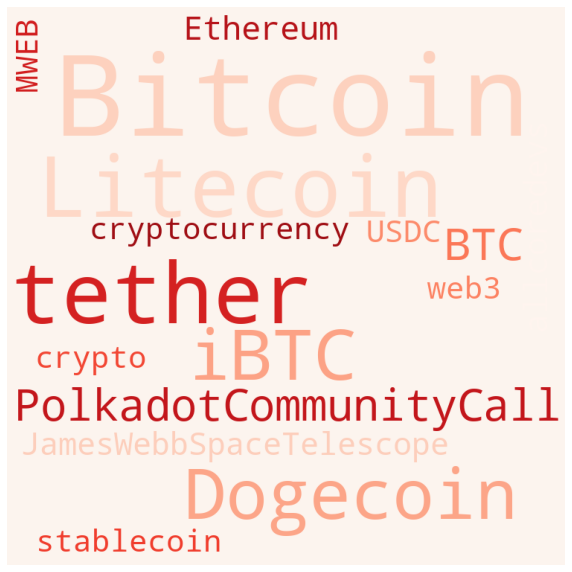

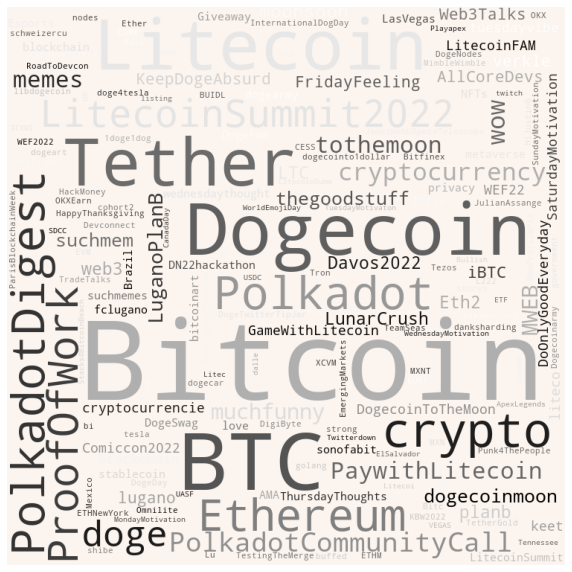

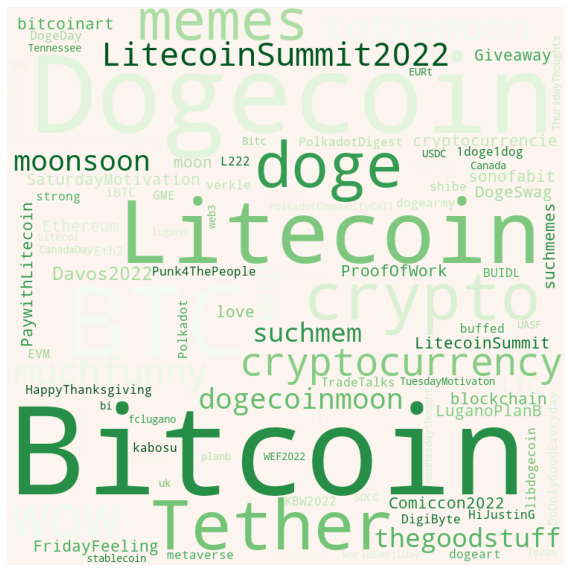

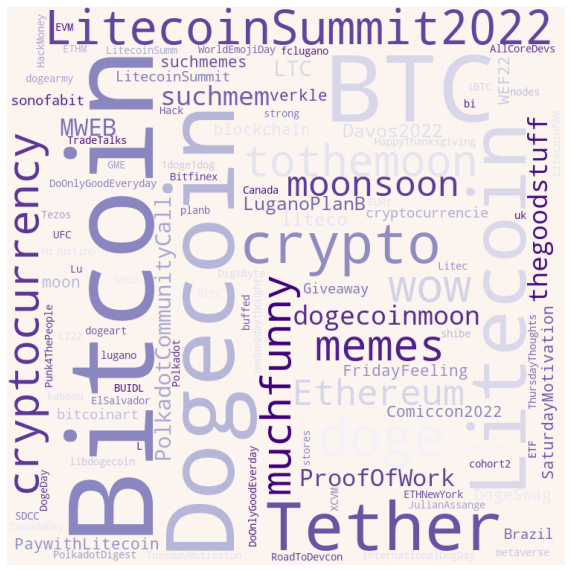

In [102]:
for key in out.keys():
    pos_tags = tweetDf['text'][tweetDf[key]>0.2].apply(hashtag_extract)
    sentiment_tags = []
    for tag in pos_tags:
        if tag!='':
            sentiment_tags.extend(tag)
    color = {'neg': Reds,'pos':Greens,'neu':Greys,'compound':Purples}
    word_cloud(sentiment_tags,color[key])
    